In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/prompt_engineering/RL
!pip install tiktoken
!pip install --upgrade "httpx<0.28"
import json
import rl
import utils
from openai import OpenAI
with open("config.json") as config_file:
    config = json.load(config_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/prompt_engineering/RL


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


The OpenAI API does not have a direct parameter to set a random seed for reproducibility in its responses. The behavior of the models is inherently non-deterministic due to randomness in the generation process.

In [2]:
V_SIZE = 50000
WORD_LEN_MIN = 3
EPOCHS = 500
PROMPT_INIT = ["find", "materials", "entities", " ", " ", " "] # "Find entities for materials and devices"
FIXED_IDS = [0, 1, 2]
ADD_TO_REPLAY = True
EXISTING_MODEL = "rply_d_biomaterials_p_['find', 'materials', 'entities', ' ', ' ', ' ']_ids_[0, 1, 2]_stats_0.668_0.0282_v_50000_wl_3_h_[64, 128]_e_5000"
MEAN_RANDOM = 0.668
STD_RANDOM = 0.0282
LRs = [1e-3, 1e-3]
HIDDENs = [64, 128]
SEED = 1734
EXP_ID = 4
PRINT_INTERVAL = 20
SAVE = False
PLOT = True
DATASET = "biomaterials"

Using device: cpu
Vocabulary size: 2274
Initial prompt: ['find', 'materials', 'entities', ' ', ' ', ' ']
Predictions: [['Functional amyloid', ' CsgA', ' FapC', ' hydrogels', ' gastrointestinal colonization', ' regenerative tissue engineering', ' cell-specific drug release', ' water-purification filters', ' biosensors.'], ['biomaterials', ' drugs', ' proteins', ' mesenchymal stromal cells', ' synthetic nanostructures', ' biological nanostructures', ' extracellular vesicles', ' immunomodulators', ' therapeutic nanocarriers'], ['immunometabolic cues', ' biomaterial microenvironment', ' immune cells', ' neutrophils', ' monocytes', ' chemokine receptor 2 (CCR2)', ' C-X3-C motif chemokine receptor 1 (CX3CR1)', ' amorphous polylactide implants', ' glycolytic inhibition', ' pro-regenerative microenvironment', ' myeloid cells']]
Scores: [0.6, 0.6666666666666666, 0.7777777777777778]
Reward: 0.6814814814814815

0 find materials entities   buffer  
Reward: 0.6936026936026937
5 find materials entit

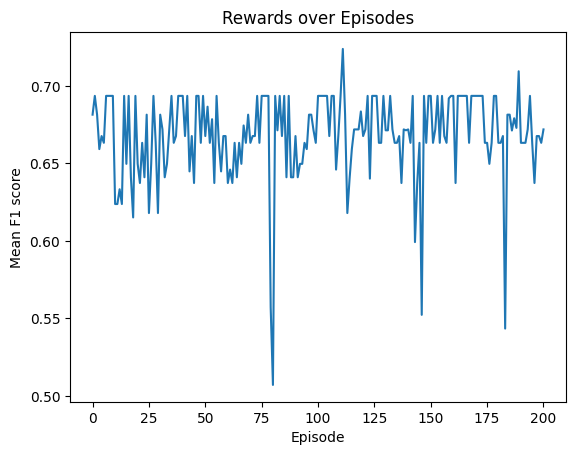

Reward mean:  0.66836282766994
Reward std:  0.028242027244261295


In [ ]:
*_, REWARDS_MEAN, REWARDS_STD = rl.random_samples(prompt_init=PROMPT_INIT, fixed_ids=FIXED_IDS, epochs=EPOCHS,
                  v_size=V_SIZE, word_len_min=WORD_LEN_MIN,
                  print_interval=PRINT_INTERVAL, plot=PLOT,
                  client=OpenAI(api_key=config["OPENAI_API_KEY"]), dataset=DATASET)

Using device: cpu
Vocabulary size: 2274
Create new buffer d_biomaterials_p_['find', 'materials', 'entities', ' ', ' ', ' ']_ids_[0, 1, 2]_stats_0.668_0.0282_v_50000_wl_3.pkl


/content/drive/MyDrive/research/prompt_engineering/RL/rl.py:193: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net_loc.load_state_dict(torch.load(f'saved_models/net_loc_{exi

Initial prompt: ['find', 'materials', 'entities', ' ', ' ', ' ']
Predictions: [['Functional amyloid', ' CsgA', ' FapC', ' hydrogels', ' gastrointestinal colonization', ' regenerative tissue engineering', ' cell-specific drug release', ' water-purification filters', ' biosensors'], ['biomaterial-based strategies', ' immune system', ' physicochemical properties', ' drugs', ' proteins', ' mesenchymal stromal cells', ' synthetic nanostructures', ' biological nanostructures', ' extracellular vesicles', ' immunomodulators', ' therapeutic nanocarriers', ' biophysical properties'], ['immunometabolic cues', ' biomaterial microenvironment', ' immune cells', ' neutrophils', ' monocytes', ' chemokine receptor 2 (CCR2)', ' C-X3-C motif chemokine receptor 1 (CX3CR1)', ' amorphous polylactide implants', ' glycolytic inhibition', ' pro-regenerative microenvironment', ' myeloid cells']]
Scores: [0.6, 0.5714285714285715, 0.7777777777777778]
Reward: 0.6497354497354498

0 find materials entities     raisi

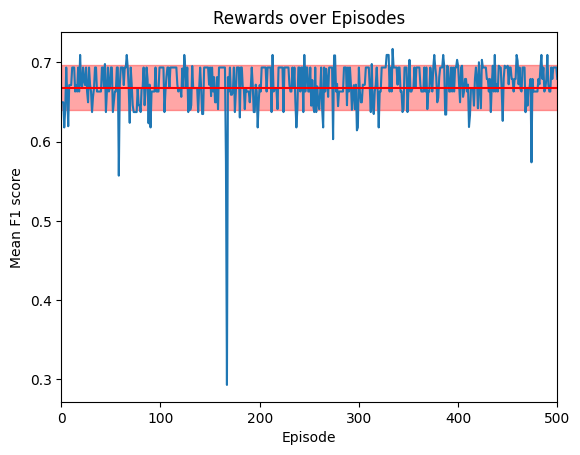

In [3]:
PROMPTS, PREDICTIONS, SCORES, REWARDS = rl.do_training(
    prompt_init=PROMPT_INIT, fixed_ids=FIXED_IDS, add_to_replay=ADD_TO_REPLAY,
    existing_model=EXISTING_MODEL,
    mean_random=MEAN_RANDOM, std_random=STD_RANDOM, epochs=EPOCHS, learning_rates=LRs,
    v_size=V_SIZE, word_len_min=WORD_LEN_MIN, hiddens=HIDDENs, seed=SEED,
    exp_id=EXP_ID, print_interval=PRINT_INTERVAL, save_results=SAVE, plot=PLOT,
    client=OpenAI(api_key=config["OPENAI_API_KEY"]), dataset=DATASET
    )

Using device: cpu
Vocabulary size: 2274
Replay buffer d_biomaterials_p_['find', 'materials', 'entities', ' ', ' ', ' ']_ids_[0, 1, 2]_stats_0.668_0.0282_v_50000_wl_3.pkl loaded.
Episode 1/1000, loss_loc: -0.1345, loss_word: -2.8413
Episode 101/1000, loss_loc: -0.3232, loss_word: -3.4346
Episode 201/1000, loss_loc: -0.0004, loss_word: 0.5696
Episode 301/1000, loss_loc: 0.2543, loss_word: 1.5616
Episode 401/1000, loss_loc: -0.0163, loss_word: 0.1002
Episode 501/1000, loss_loc: 0.0613, loss_word: 0.7473
Episode 601/1000, loss_loc: -0.1338, loss_word: -0.5293
Episode 701/1000, loss_loc: 0.1455, loss_word: 1.0622
Episode 801/1000, loss_loc: 0.3366, loss_word: 2.0174
Episode 901/1000, loss_loc: 0.0780, loss_word: -0.3210


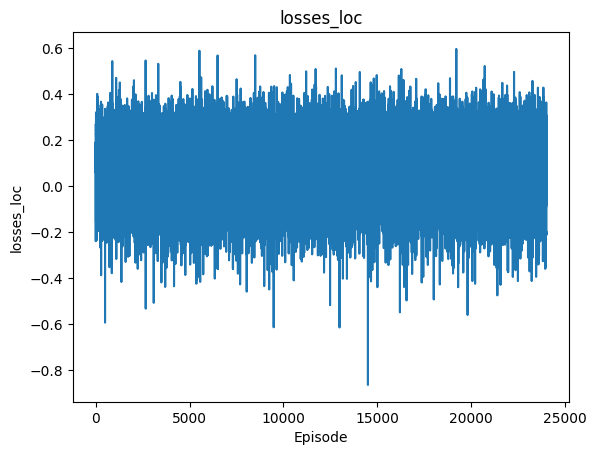

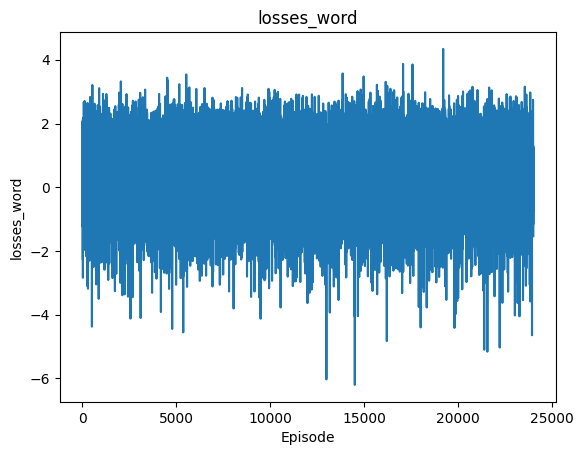

In [3]:
V_SIZE = 50000
WORD_LEN_MIN = 3
EPOCHS = 1000
PROMPT_INIT = ["find", "materials", "entities", " ", " ", " "]
BATCH_SIZE = 64
MEAN_RANDOM = 0.668
STD_RANDOM = 0.0282
LRs = [1e-3, 1e-4]
HIDDENs = [64, 128]
SEED = 12634
PRINT_INTERVAL = 100
REPLAY_NAME = "d_biomaterials_p_['find', 'materials', 'entities', ' ', ' ', ' ']_ids_[0, 1, 2]_stats_0.668_0.0282_v_50000_wl_3"
rl.do_training_exp_rply(prompt_length=len(PROMPT_INIT), replay_name=REPLAY_NAME, batch_size=BATCH_SIZE,
                        mean_random=MEAN_RANDOM, std_random=STD_RANDOM, epochs=EPOCHS, learning_rates=LRs,
                        v_size=V_SIZE, word_len_min=WORD_LEN_MIN, hiddens=HIDDENs, seed=SEED,
                        print_interval=PRINT_INTERVAL)

In [6]:
# Inspect buffer
import pickle
name = "d_biomaterials_p_['find', 'materials', 'entities', ' ', ' ', ' ']_ids_[0, 1, 2]_stats_0.668_0.0282_v_50000_wl_3"
try:
    with open(f"buffer/{name}.pkl", 'rb') as f:
        buffer = pickle.load(f)
        print(f"Replay buffer {name}.pkl loaded.")
except:
    print(f"{name}.pkl does not exist!")

Replay buffer d_biomaterials_p_['find', 'materials', 'entities', ' ', ' ', ' ']_ids_[0, 1, 2]_stats_0.668_0.0282_v_50000_wl_3.pkl loaded.
